<a href="https://colab.research.google.com/github/mohiitt/OASIS-INFOBYTE-DS-INTERNSHIP-WORK/blob/main/unemployment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [2]:
df = pd.read_csv('./datasets/Unemployment_Rate_upto_11_2020.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [6]:
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

In [7]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [8]:
df['Frequency'] = df['Frequency'].astype('category')

In [9]:
df['Month'] = df['Date'].dt.month
df['Month_int'] = df['Month'].apply(lambda x: int(x))
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [10]:
df['Region'] = df['Region'].astype('category')

In [11]:
df.drop(columns='Month', inplace=True)

In [12]:
df_stats = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]

In [13]:
round(df_stats.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [14]:
region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].mean().reset_index()
region_stats = round(region_stats, 2)
region_stats

<ipython-input-14-c1f2208e394e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].mean().reset_index()


,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


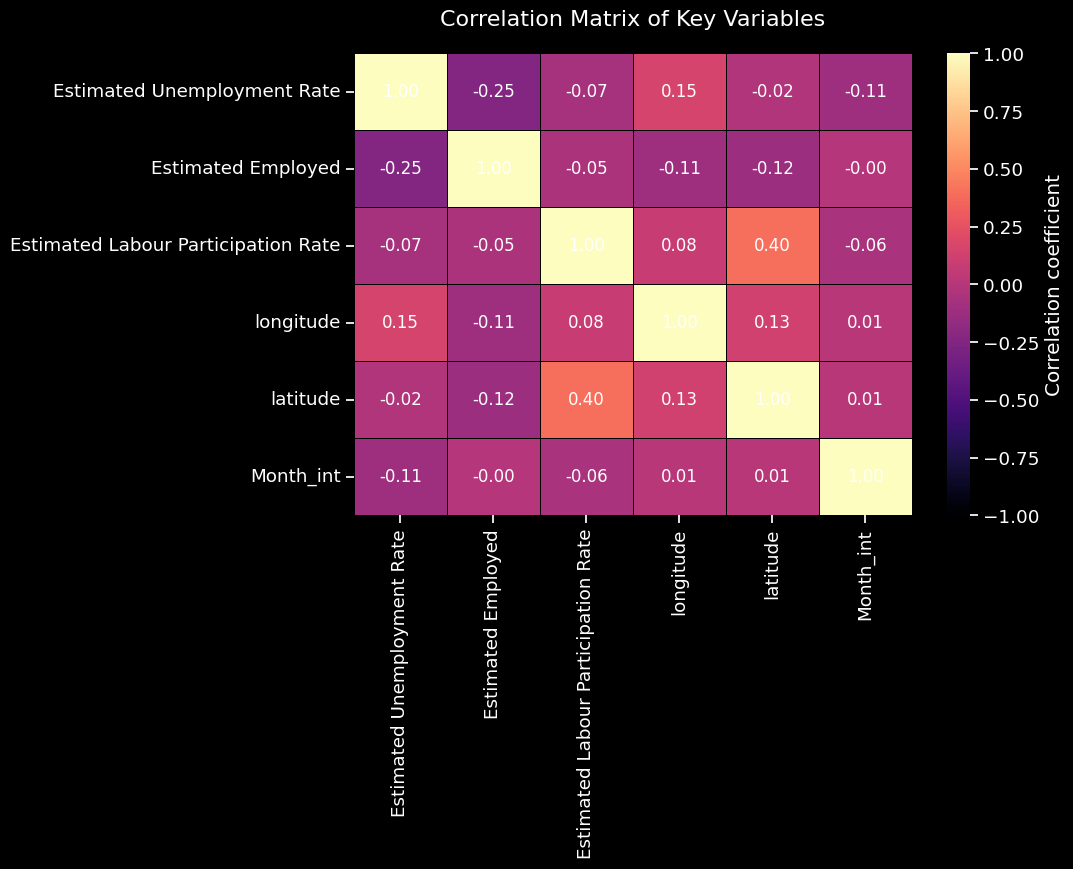

In [115]:
plt.style.use('dark_background')
heat_maps = df[['Estimated Unemployment Rate', 'Estimated Employed',
                'Estimated Labour Participation Rate', 'longitude', 'latitude', 'Month_int']].corr()

plt.figure(figsize=(9, 6))
sns.set_context('notebook', font_scale=1.2)
sns.heatmap(heat_maps, annot=True, fmt='.2f', cmap='magma',
            linewidths=0.5, linecolor='black', annot_kws={"size": 12, "color": 'white'},
            cbar_kws={'label': 'Correlation coefficient'},
            vmin=-1, vmax=1)

plt.title('Correlation Matrix of Key Variables', fontsize=16, pad=20, color='white')
plt.show()


In [107]:
fig = px.violin(df, x='States', y='Estimated Unemployment Rate', color='States',
                box=True, points='all', title='Unemployment Rate Distribution by State', template='plotly_dark')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()


In [44]:

fig = px.scatter_matrix(df,
                        template='plotly_dark',  # Choose the template you prefer
                        dimensions=['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate'],
                        color='Region',  # Column to be used for coloring the points
                        color_continuous_scale='RdBu')  # Adjust color scale
fig.update_layout(
    title='Scatter Matrix of Employment Data',
    xaxis_title='Labor Metrics',
    yaxis_title='Region'
)
fig.show()


In [79]:
fig = px.scatter(df_unemp, x='States', y='Estimated Unemployment Rate',
                 color='Estimated Unemployment Rate',
                 title='Average Unemployment Rate in each state',
                 color_continuous_scale='Plasma',
                 template='plotly_dark')
fig.show()


In [59]:
fig = px.sunburst(
    unemplo,
    path=['Region', 'States'],
    values='Estimated Unemployment Rate',
    color='Estimated Unemployment Rate',
    color_continuous_scale='Viridis',
    hover_data={
        'Estimated Unemployment Rate': True,
        'Region': True,
        'States': True
    },
    title='Unemployment Rate by Region and State',
    height=700,
    template='plotly_dark'
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    title_font_size=20,
    font_family="Arial"
)

fig.show()


/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [72]:
fig = px.bar(
    plot_per,
    x='States',
    y='percentage change in unemployment',
    color='percentage change in unemployment',
    color_continuous_scale='Cividis',
    title='Percentage Change in Unemployment in Each State After Lockdown',
    template='plotly_dark'
)
fig.update_layout(
    title_font_size=20,
    xaxis_title="States",
    yaxis_title="Percentage Change in Unemployment",
    font_family="Arial",
    margin=dict(t=50, l=50, r=50, b=50),
    coloraxis_colorbar=dict(
        title="Change (%)",
        ticks="outside"
    )
)

fig.show()


In [80]:
import plotly.express as px
fig = px.scatter(
    plot_per,
    x='States',
    y='percentage change in unemployment',
    size= plot_per['percentage change in unemployment'].abs(),
    color='percentage change in unemployment',
    color_continuous_scale='Plasma',
    title='Bubble Chart: Percentage Change in Unemployment in Each State After Lockdown',
    template='plotly_dark'
)
fig.update_layout(
    title_font_size=20,
    xaxis_title="States",
    yaxis_title="Percentage Change in Unemployment",
    font_family="Verdana",
    margin=dict(t=50, l=50, r=50, b=50),
    coloraxis_colorbar=dict(
        title="Change (%)",
        ticks="outside"
    )
)

fig.update_xaxes(tickangle=45)

fig.show()


In [98]:
fig = px.bar(df, x='Region',
             y='Estimated Unemployment Rate',
             color='States',
             animation_frame='Month_name',
             title='Unemployment rate across region from Jan. 2020 to Oct. 2020',
             height=700,
             template='plotly_dark',
             barmode='overlay')

fig.update_layout(xaxis={'categoryorder': 'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 500

fig.show()